# EDA ANALYSIS

In [ ]:
!pip install statsmodels
!pip install pmdarima

In [ ]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import scipy.stats as scs
from itertools import product 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import warnings
from statsmodels.tsa.api import ExponentialSmoothing
import statsmodels as sm

In [ ]:
#READ DATA
df = pd.read_csv("OpportunityProductQuantityData.csv")
df['CloseDate']= pd.to_datetime(df['CloseDate'])
df.head(2)

,CloseDate,StageName,Vertical__c,Segment__c,ProductQty
0,2000-12-18,Closed Dead,Logistics,Government,1
1,2007-12-15,Closed Dead,undefined,undefined,7


In [ ]:
#DESCRIBE DATA
df.describe()

,ProductQty
count,48008.000000
mean,15.771621
std,65.139593
min,0.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,4928.000000


In [ ]:
df.isnull().sum()

CloseDate      0
StageName      0
Vertical__c    0
Segment__c     0
ProductQty     0
dtype: int64

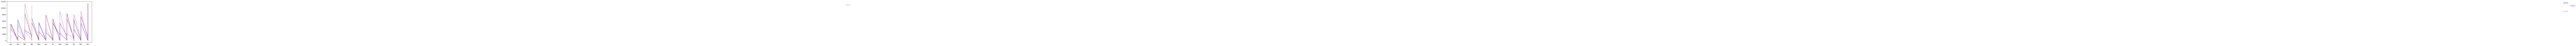

In [ ]:
#PLOT EACH YEARS MONTHLY DATA 
data = pd.read_csv('OpportunityProductQuantityData.csv')
data = pd.DataFrame(data)
data["CloseDate"]= pd.to_datetime(data["CloseDate"])
data1 = data.groupby(['CloseDate']).sum()

daterange = pd.date_range(start="2017-01-01",end="2021-04-30")
daterange = pd.DataFrame(daterange)

daterange.columns = ['CloseDate']
data1 = daterange.merge(data1, on='CloseDate', how='left')
data1['ProductQty'] = data1['ProductQty'].fillna(0)

# Prepare data
data1['year'] = pd.DatetimeIndex(data1['CloseDate']).year
data1['month'] = pd.DatetimeIndex(data1['CloseDate']).month

df = pd.DataFrame(data1)
data1.set_index('CloseDate', inplace=True)


data = pd.read_csv('OpportunityProductQuantityData.csv')
data = pd.DataFrame(data)

data["CloseDate"]= pd.to_datetime(data["CloseDate"])
df = data.groupby(['CloseDate']).sum()

daterange = pd.date_range(start="2017-01-01",end="2021-04-30")
daterange = pd.DataFrame(daterange)

daterange.columns = ['CloseDate']

data1 = daterange.merge(data1, on='CloseDate', how='left')
data1['ProductQty'] = data1['ProductQty'].fillna(0)

df = data1
df['year'] = [d.year for d in df.CloseDate]
df['month'] = [d.strftime('%b') for d in df.CloseDate]
years = df['year'].unique()

import matplotlib as mpl
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)
plt.figure(figsize=(10,5), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'ProductQty', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'ProductQty'][-1:].values[0], y, fontsize=12, color=mycolors[i])


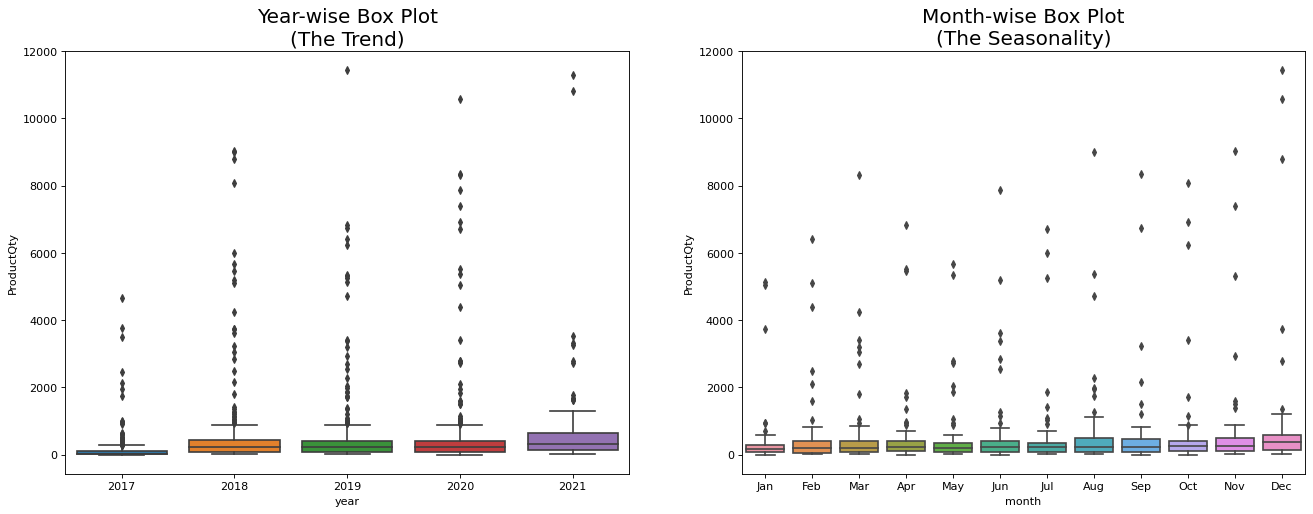

In [ ]:
#GENERATE BOX PLOTS
import matplotlib.pyplot as plt
import seaborn as sns
df['year'] = [d.year for d in df.CloseDate]
df['month'] = [d.strftime('%b') for d in df.CloseDate]
years = df['year'].unique()

get_ipython().run_line_magic('matplotlib', 'inline')

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='ProductQty', data=df, ax=axes[0])
sns.boxplot(x='month', y='ProductQty', data=df.loc[~df.year.isin([2017, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# FILTERING DATA

In [ ]:
#FILTERING DATA
df = pd.read_csv("OpportunityProductQuantityData.csv")
df['CloseDate']= pd.to_datetime(df['CloseDate'])
filtered_df = df.loc[(df['CloseDate'] >= '2017-01-01') & (df['CloseDate'] <= '2021-04-30') & (df['StageName'] == 'Closed Won')]
filtered_df.head(5)


,CloseDate,StageName,Vertical__c,Segment__c,ProductQty
21,2017-01-02,Closed Won,Food and Beverage,Agriculture,1
22,2017-01-04,Closed Won,Logistics,Dealers,2
23,2017-01-05,Closed Won,Logistics,Dealers,3
26,2017-01-06,Closed Won,Food and Beverage,Food Processing,9
30,2017-01-10,Closed Won,Logistics,Dealers,5


In [ ]:
Daily = filtered_df.set_index('CloseDate').resample('D')["ProductQty"].sum()
Daily = Daily.to_frame()
weekly = filtered_df.set_index('CloseDate').resample('W')["ProductQty"].sum()
weekly = weekly.to_frame()
monthly = filtered_df.set_index('CloseDate').resample('M')["ProductQty"].sum()
monthly = monthly.to_frame()
yearly = filtered_df.set_index('CloseDate').resample('Y')["ProductQty"].sum()
yearly = yearly.to_frame()
weekly.tail()

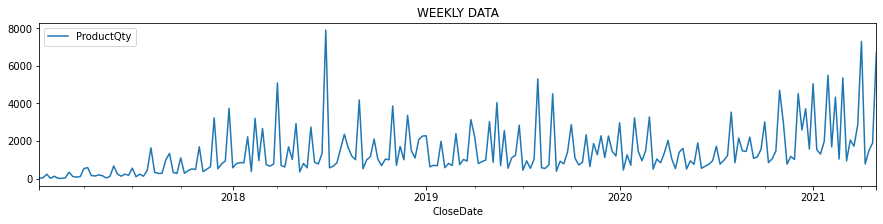

In [ ]:
weekly.plot(figsize=(15, 3))
plt.title("WEEKLY DATA")
plt.show()

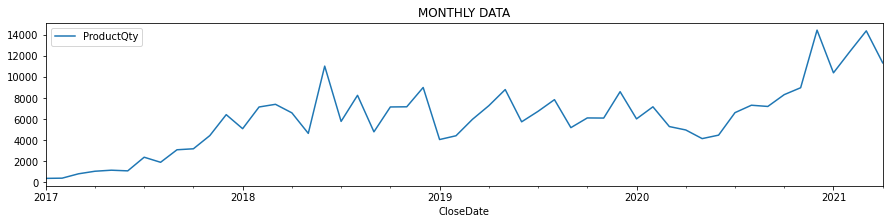

In [ ]:
monthly.plot(figsize=(15, 3))
plt.title("MONTHLY DATA")
plt.show()

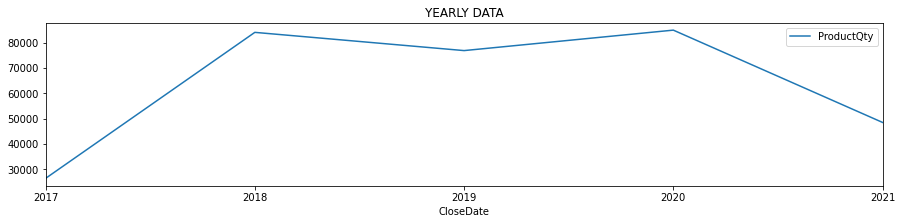

In [ ]:
yearly.plot(figsize=(15, 3))
plt.title("YEARLY DATA")
plt.show()

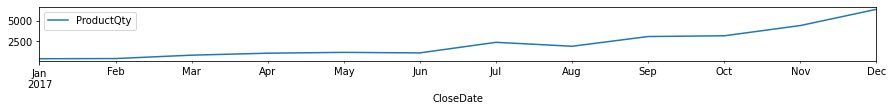

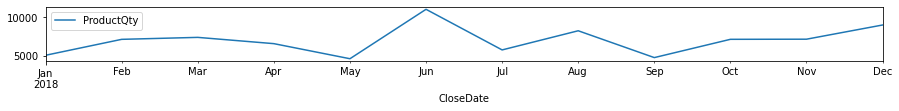

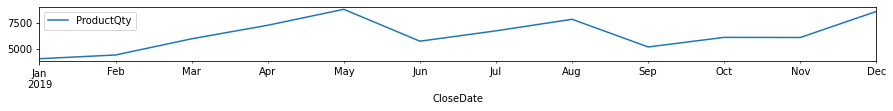

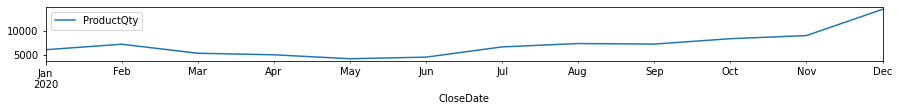

In [ ]:
#MONTHLY DATA - YEAR WISE
df = pd.read_csv("OpportunityProductQuantityData.csv")
df['CloseDate']= pd.to_datetime(df['CloseDate'])
df2017 = df.loc[(df['CloseDate'] >= '2017-01-01') & (df['CloseDate'] <= '2017-12-31') & (df['StageName'] == 'Closed Won')]
df2017 = df2017.set_index('CloseDate').resample('M')["ProductQty"].sum()
df2017 = df2017.to_frame()
df2018 = df.loc[(df['CloseDate'] >= '2018-01-01') & (df['CloseDate'] <= '2018-12-31') & (df['StageName'] == 'Closed Won')]
df2018 = df2018.set_index('CloseDate').resample('M')["ProductQty"].sum()
df2018 = df2018.to_frame()
df2019 = df.loc[(df['CloseDate'] >= '2019-01-01') & (df['CloseDate'] <= '2019-12-31') & (df['StageName'] == 'Closed Won')]
df2019 = df2019.set_index('CloseDate').resample('M')["ProductQty"].sum()
df2019 = df2019.to_frame()
df2020 = df.loc[(df['CloseDate'] >= '2020-01-01') & (df['CloseDate'] <= '2020-12-31') & (df['StageName'] == 'Closed Won')]
df2020 = df2020.set_index('CloseDate').resample('M')["ProductQty"].sum()
df2020 = df2020.to_frame()
df2017.plot(figsize=(15, 1))
df2018.plot(figsize=(15, 1))
df2019.plot(figsize=(15, 1))
df2020.plot(figsize=(15, 1))
plt.show()

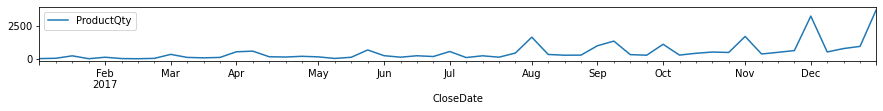

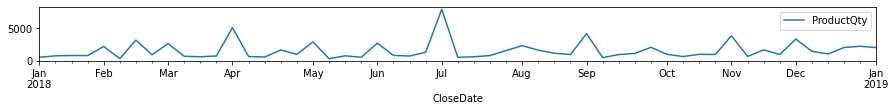

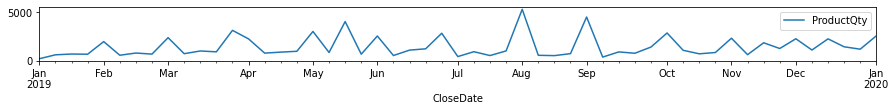

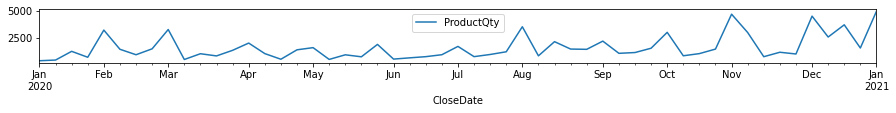

In [ ]:
#MONTHLY DATA - YEAR WISE
df = pd.read_csv("OpportunityProductQuantityData.csv")
df['CloseDate']= pd.to_datetime(df['CloseDate'])
df2017 = df.loc[(df['CloseDate'] >= '2017-01-01') & (df['CloseDate'] <= '2017-12-31') & (df['StageName'] == 'Closed Won')]
df2017 = df2017.set_index('CloseDate').resample('W')["ProductQty"].sum()
df2017 = df2017.to_frame()
df2018 = df.loc[(df['CloseDate'] >= '2018-01-01') & (df['CloseDate'] <= '2018-12-31') & (df['StageName'] == 'Closed Won')]
df2018 = df2018.set_index('CloseDate').resample('W')["ProductQty"].sum()
df2018 = df2018.to_frame()
df2019 = df.loc[(df['CloseDate'] >= '2019-01-01') & (df['CloseDate'] <= '2019-12-31') & (df['StageName'] == 'Closed Won')]
df2019 = df2019.set_index('CloseDate').resample('W')["ProductQty"].sum()
df2019 = df2019.to_frame()
df2020 = df.loc[(df['CloseDate'] >= '2020-01-01') & (df['CloseDate'] <= '2020-12-31') & (df['StageName'] == 'Closed Won')]
df2020 = df2020.set_index('CloseDate').resample('W')["ProductQty"].sum()
df2020 = df2020.to_frame()
df2021 = df.loc[(df['CloseDate'] >= '2020-01-01') & (df['CloseDate'] <= '2020-12-31') & (df['StageName'] == 'Closed Won')]
df2021 = df2021.set_index('CloseDate').resample('W')["ProductQty"].sum()
df2021 = df2021.to_frame()
df2017.plot(figsize=(15, 1))
df2018.plot(figsize=(15, 1))
df2019.plot(figsize=(15, 1))
df2020.plot(figsize=(15, 1))
plt.show()

In [ ]:
df2021.describe()

,ProductQty
count,53.000000
mean,1603.000000
std,1132.481567
min,389.000000
25%,842.000000
50%,1217.000000
75%,1899.000000
max,4962.000000


# ERRORS FUNCTION

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

def ERROR_Check(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    print("MAPE : ", mape)
    rms = sqrt(mean_squared_error(Y_actual, Y_Predicted))
    print("RMS : ", rms)
    mae = mean_absolute_error(Y_actual, Y_Predicted)
    print("MAE : ", mae)
    return mape, rms, mae
    

In [ ]:
column_names = ["Forecast", "MAPE", "RMS","MAE"]
error = pd.DataFrame(columns= column_names)
error_month = pd.DataFrame(columns= column_names)

# Naive Approach

In [ ]:
#Creating train and test set 
filtered_df = df.loc[(df['CloseDate'] >= '2017-01-01') & (df['CloseDate'] <= '2021-04-30') & (df['StageName'] == 'Closed Won')]
#Aggregating the dataset at weekly level
filtered_df.Timestamp = pd.to_datetime(filtered_df.CloseDate,format='%d-%m-%Y %H:%M') 
filtered_df.index = filtered_df.Timestamp 
filtered_df = filtered_df.resample('W').sum()
filtered_df['ProductQty'] = filtered_df['ProductQty'].fillna(0)
filtered_dfM = filtered_df.resample('M').sum()
filtered_dfM['ProductQty'] = filtered_df['ProductQty'].fillna(0)


In [ ]:
def naive(filtered_df,z):
  train=filtered_df.sample(frac=0.5)
  test=filtered_df.drop(train.index)
  predictN= test.copy()
  predictN['naive_prediction'] = predictN.shift(periods=1)
  plt.figure(figsize=(15,3))
  plt.plot(test.index, test['ProductQty'], label='Original Data')
  plt.plot(predictN.index,predictN['naive_prediction'], label='Naive Forecast')
  plt.legend(loc='best')
  plt.title("Naive Forecast")
  plt.show()
  if z == 'M':
    a,b,c = ERROR_Check(test['ProductQty'].fillna(0),predictN['naive_prediction'].fillna(0))
    error_month.loc[len(error.index)] = ['Naive', a, b,c] 
  else:
    a,b,c = ERROR_Check(test['ProductQty'].fillna(0),predictN['naive_prediction'].fillna(0))
    error.loc[len(error.index)] = ['Naive', a, b,c] 

  print(predictN.tail())

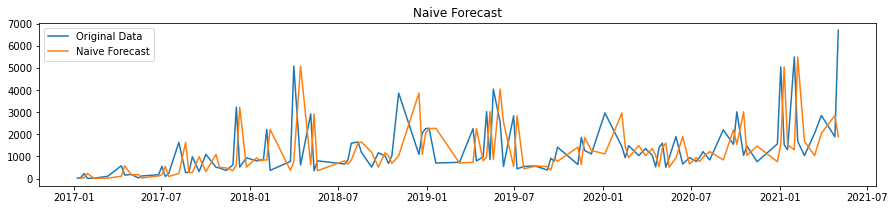

MAPE :  129.44657216450756
RMS :  1477.8454809237417
MAE :  978.3805309734513
            ProductQty  naive_prediction
CloseDate                               
2021-02-21        1036            1683.0
2021-03-14        2046            1036.0
2021-03-28        2849            2046.0
2021-04-25        1890            2849.0
2021-05-02        6709            1890.0


In [ ]:
#Weekly Forecast
naive(weekly, 'W')


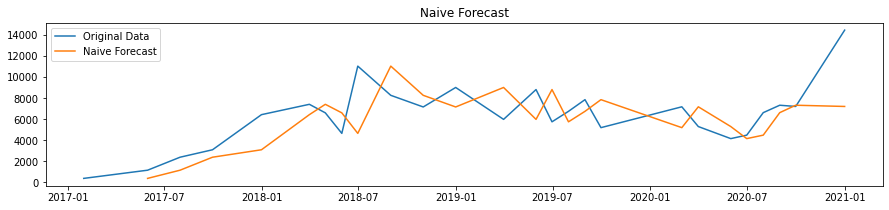

MAPE :  34.40316716555441
RMS :  2586.837919753946
MAE :  1976.9615384615386
            ProductQty  naive_prediction
CloseDate                               
2020-06-30        4483            4154.0
2020-07-31        6614            4483.0
2020-08-31        7317            6614.0
2020-09-30        7201            7317.0
2020-12-31       14433            7201.0


In [ ]:
#MOnthly Forecast
naive(monthly, 'M')

# Simple Average

In [ ]:
def simple_avg(filtered_df, z):
  train=filtered_df.sample(frac=0.5)
  test=filtered_df.drop(train.index)
  predict= test.copy()
  
  predict['Simple_Avg'] = test['ProductQty'].mean()
  plt.figure(figsize=(12,3))
  plt.plot(test['ProductQty'], label='Original Data')
  plt.plot(predict['Simple_Avg'], label='Average Forecast')
  plt.legend(loc='best')
  plt.show()

  print(predict.tail())  
  if z == 'M':
    a,b,c = ERROR_Check(test['ProductQty'],predict['Simple_Avg'].fillna(0))
    error_month.loc[len(error.index)] = ['Simple Average', a, b,c] 
  else :
    a,b,c = ERROR_Check(test['ProductQty'],predict['Simple_Avg'].fillna(0))
    error.loc[len(error.index)] = ['Simple Average', a, b,c] 
  

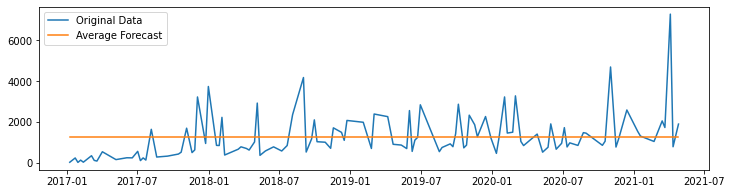

            ProductQty   Simple_Avg
CloseDate                          
2021-03-14        2046  1249.353982
2021-03-21        1722  1249.353982
2021-04-04        7293  1249.353982
2021-04-11         776  1249.353982
2021-04-25        1890  1249.353982
MAPE :  403.4260145889463
RMS :  1083.1518652488699
MAE :  774.8758712506852


In [ ]:
simple_avg(weekly, 'W')

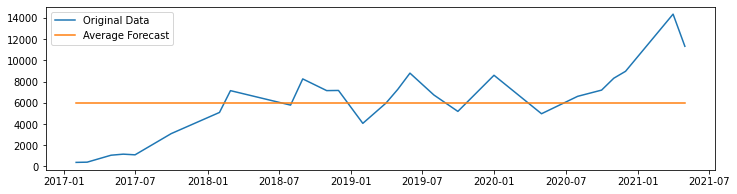

            ProductQty   Simple_Avg
CloseDate                          
2020-09-30        7201  6009.538462
2020-10-31        8321  6009.538462
2020-11-30        8975  6009.538462
2021-03-31       14365  6009.538462
2021-04-30       11333  6009.538462
MAPE :  181.9100276339635
RMS :  3338.2172030403526
MAE :  2601.189349112426


In [ ]:
simple_avg(monthly, 'M')

# MOVING AVERAGE

In [ ]:
def moving_avg(filtered_df,window, z):
  train=filtered_df.sample(frac=0.5)
  test=filtered_df.drop(train.index)
  predict= test.copy()
  #z= int(input("ENter WIndow Size: "))
  predict['moving_avg'] = test['ProductQty'].rolling(window).mean()
  plt.figure(figsize=(16,3))
  plt.plot(filtered_df['ProductQty'], label='Original Data')
  plt.plot(predict['moving_avg'], label='Moving Average Forecast')
  plt.legend(loc='best')
  plt.show()
  if z == 'M':
    a,b,c = ERROR_Check(test['ProductQty'],predict['moving_avg'].fillna(0))
    error_month.loc[len(error.index)] = ['Moving Average', a, b,c]
  else:
    a,b,c = ERROR_Check(test['ProductQty'],predict['moving_avg'].fillna(0))
    error.loc[len(error.index)] = ['Moving Average', a, b,c]
  print(predict.tail())


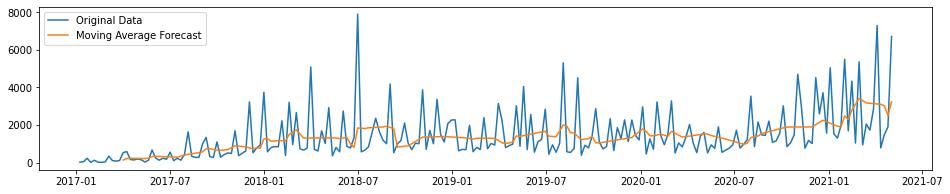

MAPE :  78.65084479010112
RMS :  1162.0332044835018
MAE :  772.5094816687738
            ProductQty   moving_avg
CloseDate                          
2021-03-14        2046  3170.000000
2021-04-11         776  3095.142857
2021-04-18        1478  3023.428571
2021-04-25        1890  2508.142857
2021-05-02        6709  3226.142857


In [ ]:
moving_avg(weekly,7, 'W')

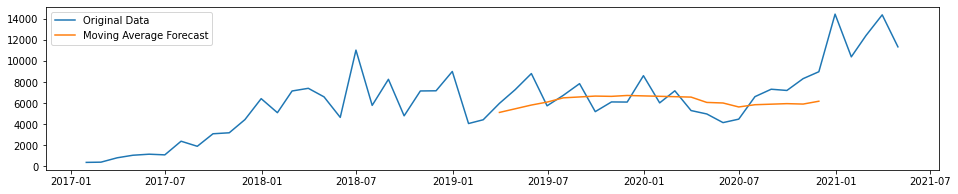

MAPE :  54.260305700127255
RMS :  4000.6048770752946
MAE :  2888.8653846153848
            ProductQty   moving_avg
CloseDate                          
2020-06-30        4483  5636.833333
2020-07-31        6614  5849.166667
2020-09-30        7201  5951.166667
2020-10-31        8321  5911.166667
2020-11-30        8975  6180.250000


In [ ]:
moving_avg(monthly,12, 'M')

# Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
def simple_exp_smoothing(filtered_df, z):
  data = filtered_df.ProductQty

  #Third Instance
  ins3 = SimpleExpSmoothing(data).fit()
  ins_cast3  = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])

  #After creating model we will visualize the plot
  ax = data.plot(marker='o', color='black', figsize=(15,5), legend=True)

  ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
  ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

  plt.show()
  x = ins3.fittedvalues
  x.to_frame(name = 'SES')
  predict= filtered_df.copy()
  predict['SES'] = x
  #ERROR_Check(filtered_df.ProductQty, predict.SES.fillna(0))  
  print(predict.tail())
  if z == 'M':
    a,b,c = ERROR_Check(filtered_df.ProductQty, predict.SES.fillna(0))
    error_month.loc[len(error.index)] = ['Simple Exponential Smoothing', a, b,c]
  else :
    a,b,c = ERROR_Check(filtered_df.ProductQty, predict.SES.fillna(0))
    error.loc[len(error.index)] = ['Simple Exponential Smoothing', a, b,c]
  
  

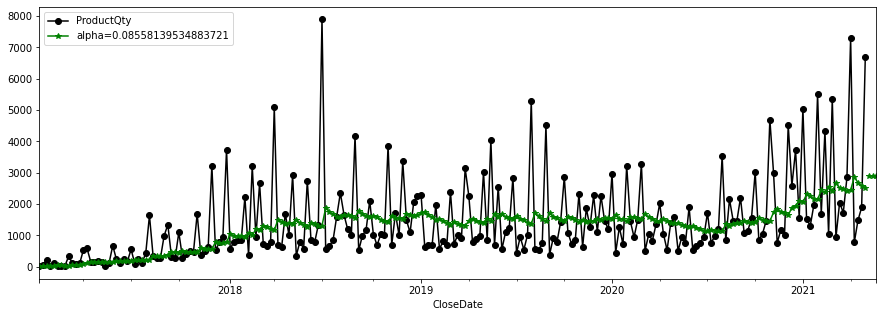

            ProductQty          SES
CloseDate                          
2021-04-04        7293  2445.557841
2021-04-11         776  2860.408705
2021-04-18        1478  2682.022099
2021-04-25        1890  2578.980208
2021-05-02        6709  2520.016320
MAPE :  71.16427499217932
RMS :  1224.118893501331
MAE :  809.6760775578011


In [ ]:
simple_exp_smoothing(weekly, 'W')

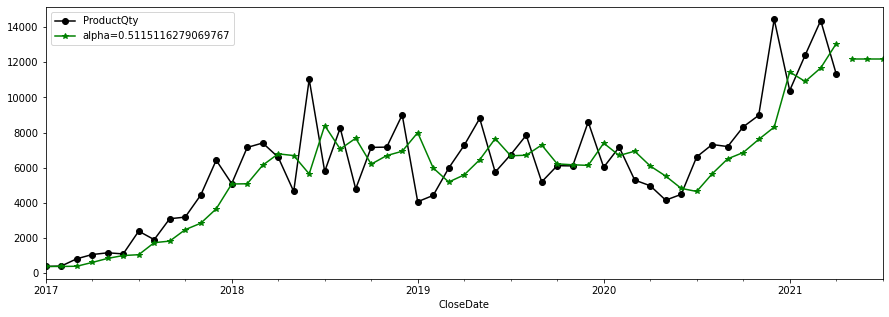

            ProductQty           SES
CloseDate                           
2020-12-31       14433   8307.103596
2021-01-31       10387  11440.570838
2021-02-28       12403  10901.657103
2021-03-31       14365  11669.611453
2021-04-30       11333  13048.334036
MAPE :  24.599847057658327
RMS :  1901.5927263122192
MAE :  1442.4815795648562


In [ ]:
simple_exp_smoothing(monthly, 'M')

# Holt’s Linear Trend method

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
def Holts_linear_trend(filtered_df, z):
  train=filtered_df.sample(frac=0.6)
  test=filtered_df.drop(train.index)
  sm.tsa.seasonal_decompose(filtered_df.ProductQty).plot()
  result = sm.tsa.stattools.adfuller(filtered_df.ProductQty)
  plt.show()

  predictions = test.copy()
  fit1 = Holt(np.asarray(test['ProductQty'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
  predictions['Holt_linear'] = fit1.forecast(len(test))

  plt.figure(figsize=(18,5))
  plt.plot(test['ProductQty'], label='Original')
  plt.plot(predictions['Holt_linear'], label='Holt_linear')
  plt.legend(loc='best')
  plt.show()
  #ERROR_Check(test.ProductQty, predictions.Holt_linear) 
  print(predictions.tail()) 
  if z == 'M':
    a,b,c = ERROR_Check(test.ProductQty, predictions.Holt_linear)
    error_month.loc[len(error.index)] = ['HOLT Linear Trend', a, b,c]
  else:
    a,b,c = ERROR_Check(test.ProductQty, predictions.Holt_linear)
    error.loc[len(error.index)] = ['HOLT Linear Trend', a, b,c]


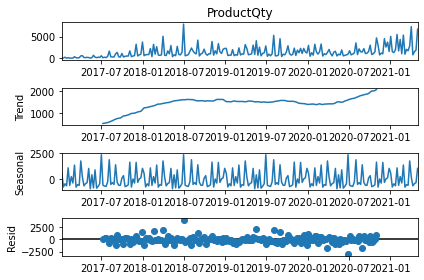

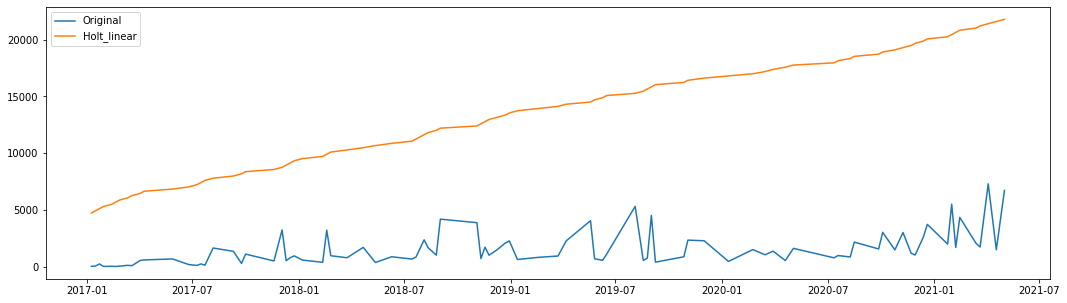

            ProductQty   Holt_linear
CloseDate                           
2021-03-14        2046  21027.884720
2021-03-21        1722  21219.768147
2021-04-04        7293  21411.651574
2021-04-18        1478  21603.535001
2021-05-02        6709  21795.418428
MAPE :  4236.897301654304
RMS :  12527.544329511766
MAE :  11738.005924138324


In [ ]:
Holts_linear_trend(weekly, 'W')

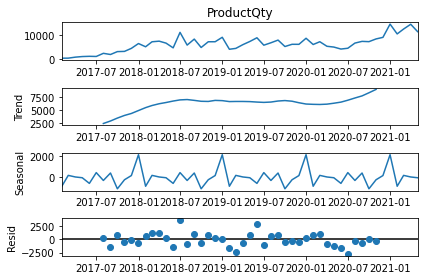

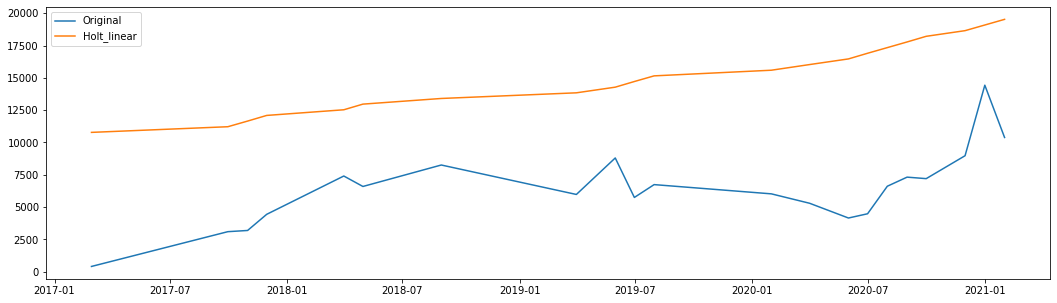

            ProductQty   Holt_linear
CloseDate                           
2020-08-31        7317  17778.700888
2020-09-30        7201  18216.040851
2020-11-30        8975  18653.380814
2020-12-31       14433  19090.720777
2021-01-31       10387  19528.060740
MAPE :  265.7056040351759
RMS :  8991.724103545512
MAE :  8700.613491651739


In [ ]:
Holts_linear_trend(monthly, 'M')

# Holt-Winters Method

In [ ]:
def Holt_winter(filtered_df,n, z):
  train=filtered_df.sample(frac=0.5)
  test=filtered_df.drop(train.index)
  fit1 = ExponentialSmoothing(np.asarray(train['ProductQty']) ,seasonal_periods=n,trend='add', seasonal='add',).fit()
  predictions = test.copy()
  predictions['Holt_Winter'] = fit1.forecast(len(test))
  plt.figure(figsize=(16,3))
  
  plt.plot(test['ProductQty'], label='Test')
  plt.plot(predictions['Holt_Winter'], label='Holt_Winter')
  plt.legend(loc='best')
  plt.show()
 
  print(predictions.tail())
  if z == 'M':
    a,b,c = ERROR_Check(test.ProductQty, predictions.Holt_Winter)
    error_month.loc[len(error.index)] = ['HOLT Winter Trend', a, b,c]
  else:
    a,b,c = ERROR_Check(test.ProductQty, predictions.Holt_Winter)
    error.loc[len(error.index)] = ['HOLT Winter Trend', a, b,c]

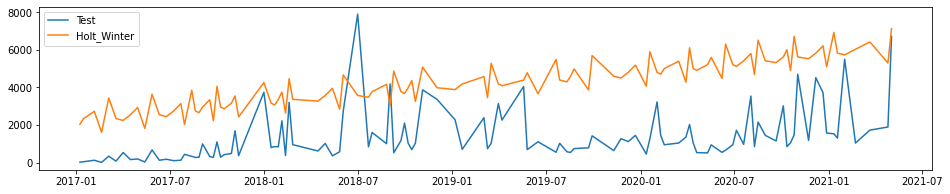

            ProductQty  Holt_Winter
CloseDate                          
2021-01-31        5497  5725.742986
2021-02-21        1036  6025.279041
2021-03-21        1722  6414.184128
2021-04-25        1890  5296.934953
2021-05-02        6709  7124.599014
MAPE :  946.4533009868585
RMS :  3193.388807055382
MAE :  2955.3282818080165


In [ ]:
Holt_winter(weekly,6, 'W')

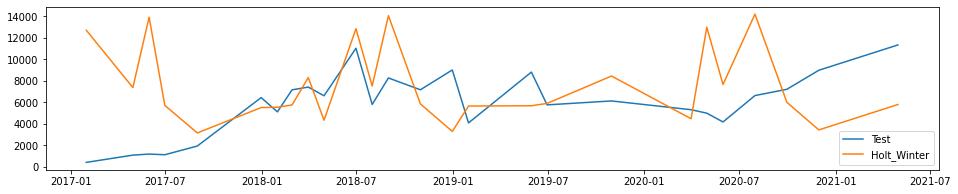

            ProductQty   Holt_Winter
CloseDate                           
2020-05-31        4154   7647.126816
2020-07-31        6614  14205.366837
2020-09-30        7201   5981.080515
2020-11-30        8975   3413.025808
2021-04-30       11333   5779.525539
MAPE :  241.58089849281276
RMS :  5100.009293644698
MAE :  3806.4454034704822


In [ ]:
Holt_winter(monthly,10, 'M')

# ARIMA

In [ ]:
filtered_df = df.loc[(df['CloseDate'] >= '2017-01-01') & (df['CloseDate'] <= '2021-04-30') & (df['StageName'] == 'Closed Won')]
train=filtered_df[0:17000] 
test=filtered_df[17001:18094]

#Aggregating the dataset at weekly level
filtered_df.Timestamp = pd.to_datetime(filtered_df.CloseDate,format='%d-%m-%Y %H:%M') 
filtered_df.index = filtered_df.Timestamp 
filtered_df = filtered_df.resample('W').mean()
filtered_df['ProductQty'] = filtered_df['ProductQty'].fillna(0)


<Figure size 432x288 with 0 Axes>

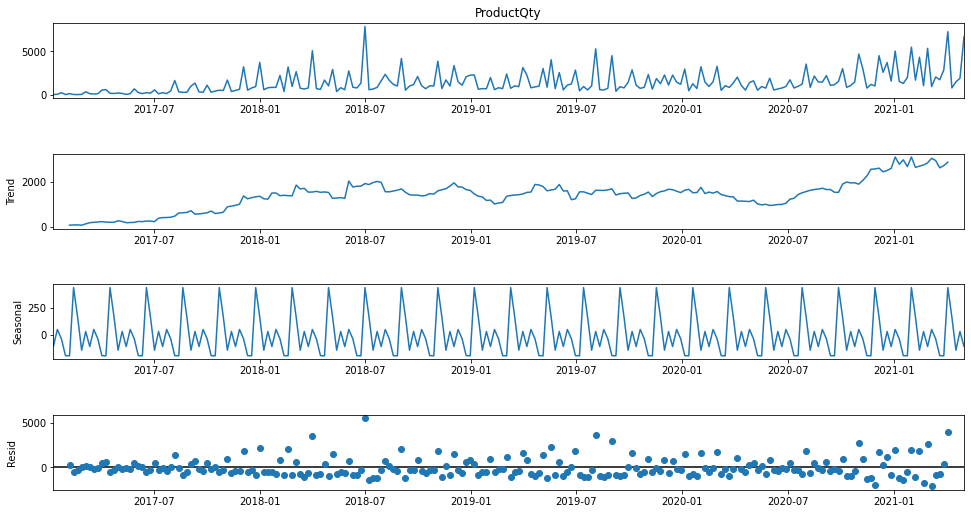

In [ ]:
#Series Decomposition
decomposition = seasonal_decompose(weekly ['ProductQty'], freq=9)  
figure = plt.figure()  
figure = decomposition.plot()  
figure.set_size_inches(15, 8)

In [ ]:
#ADF TEST to check stationarity
def check_adf(time_series):
    test_result = adfuller(time_series)
    print ('ADF Test:')
    labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']
    for value,label in zip(test_result,labels):
        print(label +':'+ str(value))
    if test_result [1] <= 0.05:
        print ("Reject null hypothesis and data is stationary")
    else:
        print ("fail to reject H0 and data is non-stationary ")

In [ ]:
check_adf(weekly ['ProductQty'])

ADF Test:
ADF Statistic:-0.8158009478843782
p-value:0.8144365400634059
No. of Lags Used:12
Number of Observations Used:213
fail to reject H0 and data is non-stationary 


In [ ]:
#First Difference
weekly ['ProductQty_diff'] = weekly ['ProductQty']- weekly ['ProductQty']. shift (1)
check_adf(weekly ['ProductQty_diff'].dropna())
#d=1

ADF Test:
ADF Statistic:-7.71563939860949
p-value:1.2304070900531714e-11
No. of Lags Used:11
Number of Observations Used:213
Reject null hypothesis and data is stationary


In [ ]:
check_adf(monthly ['ProductQty'])

ADF Test:
ADF Statistic:-1.3700759466396524
p-value:0.5965350691527556
No. of Lags Used:1
Number of Observations Used:50
fail to reject H0 and data is non-stationary 


In [ ]:
#First Difference
monthly ['ProductQty_diff'] = monthly ['ProductQty']- monthly ['ProductQty']. shift (1)
check_adf(monthly ['ProductQty_diff'].dropna())
#d=1

ADF Test:
ADF Statistic:-12.704663978487204
p-value:1.0614738833686612e-23
No. of Lags Used:0
Number of Observations Used:50
Reject null hypothesis and data is stationary


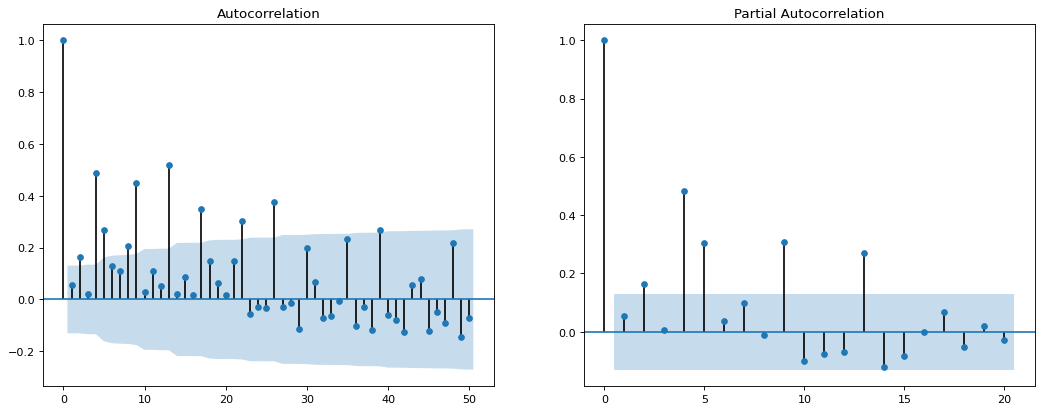

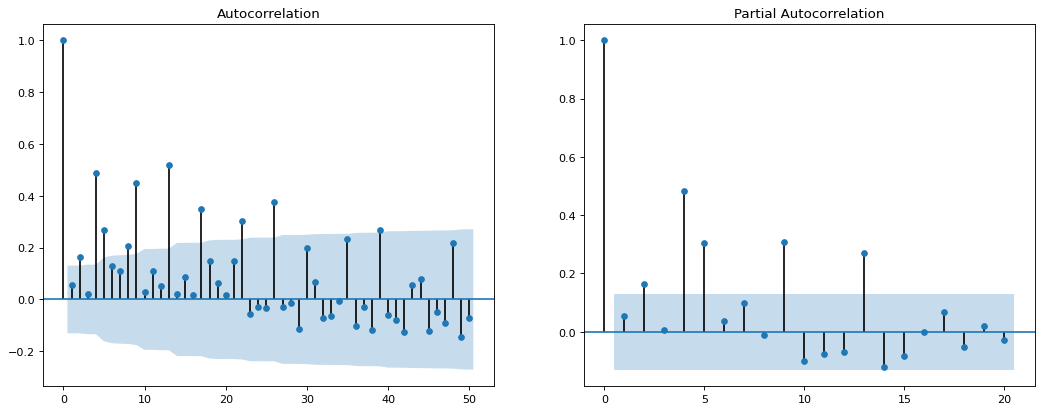

In [ ]:

#Plotting ACF AND PACF Graphs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(weekly.ProductQty.tolist(), ax=ax1, lags=50)
plot_pacf(weekly.ProductQty.tolist(), ax=ax2, lags=20)
#p =2,3,4 #q = 1


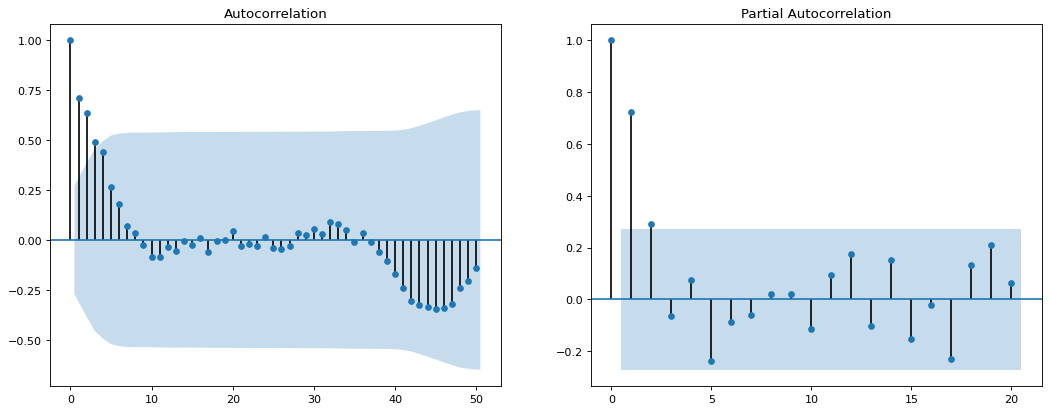

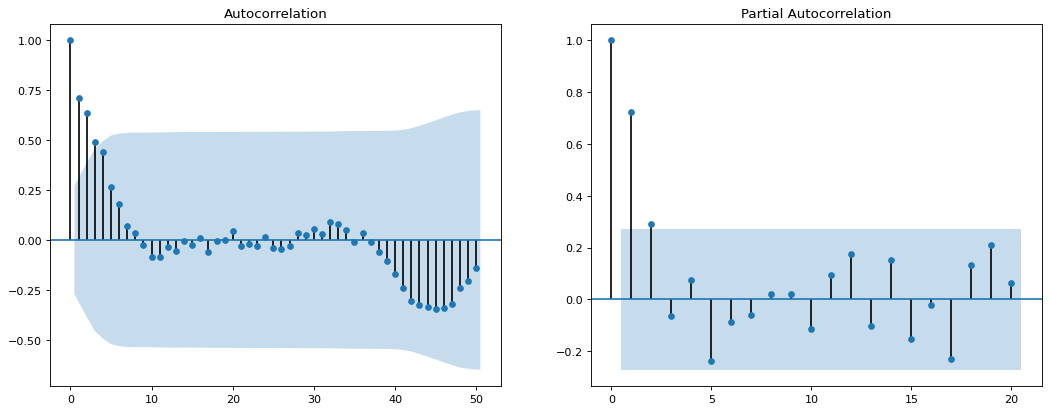

In [ ]:

#Plotting ACF AND PACF Graphs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(monthly.ProductQty.tolist(), ax=ax1, lags=50)
plot_pacf(monthly.ProductQty.tolist(), ax=ax2, lags=20)
#p =2,3,4 #q = 0,1

In [ ]:
#FUNCTION TO GET BEST PDQ VALUES
warnings.filterwarnings("ignore")
# Fit auto_arima function to  dataset
stepwise_fit = auto_arima(weekly['ProductQty'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 7,
                          start_P = 0, d = 1 , seasonal = True, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=1.15 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=4051.490, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=3925.158, Time=0.41 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.70 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=4000.867, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=3861.288, Time=1.12 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=1.26 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.56 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=3971.566, Time=0.18 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=3846.837, Time=1.17 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=3914.264, Time=0.56 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=1.44 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=0.78 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=3773.913, Time=1.73 sec
 ARIMA(3,1,0)(1,1,0)[7]             : AIC=3813.794, Time=0.32 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  226
Model:             SARIMAX(3, 1, 0)x(2, 1, [1], 7)   Log Likelihood               -1857.129
Date:                             Tue, 01 Jun 2021   AIC                           3728.258
Time:                                     09:05:55   BIC                           3751.949
Sample:                                          0   HQIC                          3737.827
                                             - 226                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8250      0.066    -12.563      0.000      -0.954      -0.696
ar.L2         -0.7034      0.069    -10.243      0.000      -0.838      -0.569
ar.L3         -0.6273      0.040    -15.578      0.000      -0.706      -0.548
ar.S.L7       -0.0216      0.113     -0.191      0.849      -0.243       0.200
ar.S.L14      -0.2460      0.093     -2.658      0.008      -0.427      -0.065
ma.S.L7       -0.8851      0.073    -12.139      0.000      -1.028      -0.742
sigma2      1.392e+06   8.42e+04     16.523      0.000    1.23e+06    1.56e+06
===================================================================================
Ljung-Box (L1) (Q):                  10.62   Jarque-Bera (JB):               222.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                             1.22
Prob(H) (two-sided):                  0.25   Kurtosis:                         7.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#FUNCTION TO GET BEST PDQ VALUES
warnings.filterwarnings("ignore")
# Fit auto_arima function to  dataset
stepwise_fit = auto_arima(monthly['ProductQty'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, d = 1 , seasonal = True, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=739.949, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=717.318, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=729.517, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=707.356, Time=1.57 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=1.74 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=1.47 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=708.986, Time=2.43 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=708.834, Time=1.50 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=707.552, Time=0.99 sec

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   52
Model:             SARIMAX(1, 1, 0)x(2, 1, [1], 12)   Log Likelihood                -348.678
Date:                              Tue, 01 Jun 2021   AIC                            707.356
Time:                                      09:06:12   BIC                            715.674
Sample:                                           0   HQIC                           710.340
                                               - 52                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5430      0.186     -2.915      0.004      -0.908      -0.178
ar.S.L12      -1.1390      0.211     -5.410      0.000      -1.552      -0.726
ar.S.L24      -0.8880      0.094     -9.398      0.000      -1.073      -0.703
ma.S.L12       0.4122      0.521      0.791      0.429      -0.609       1.433
sigma2      2.032e+06   8.64e+05      2.351      0.019    3.38e+05    3.73e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.11
Prob(Q):                              0.91   Prob(JB):                         0.95
Heteroskedasticity (H):               0.80   Skew:                            -0.01
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

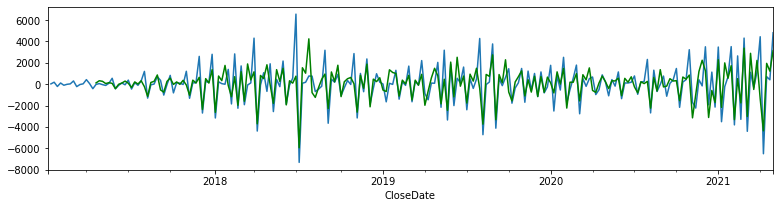

In [ ]:
#ARIMA MODEL
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(weekly.ProductQty, order=(3,1,0))
model_fit = model.fit(disp=0)
predic = weekly.copy()
predic['ARIMA'] = model_fit.predict(start = 15, end = 225)
predic['ProductQty_diff'].plot(figsize = (13,3), label='Actual Data')
predic['ARIMA'].plot(color = 'Green', label='AR prediction')



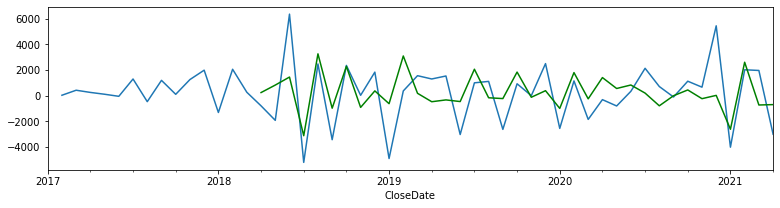

In [ ]:

model_m = ARIMA(monthly.ProductQty, order=(1,1,0))
model_fit_m = model_m.fit(disp=0)
predic_m = monthly.copy()
predic_m['ARIMA'] = model_fit_m.predict(start = 15, end = 225)
predic_m['ProductQty_diff'].plot(figsize = (13,3), label='Actual Data')
predic_m['ARIMA'].plot(color = 'Green', label='AR prediction')
#ERROR_Check(predic['ProductQty_diff'],predic['ARIMA'])

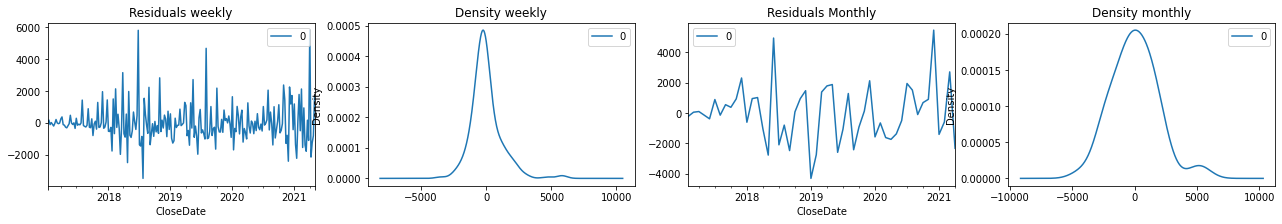

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals_m = pd.DataFrame(model_fit_m.resid)
fig, ax = plt.subplots(1,4)
residuals.plot(title="Residuals weekly", ax=ax[0], figsize = (22,3))
residuals.plot(kind='kde', title='Density weekly', ax=ax[1], figsize = (22,3))
residuals_m.plot(title="Residuals Monthly", ax=ax[2], figsize = (22,3))
residuals_m.plot(kind='kde', title='Density monthly', ax=ax[3], figsize = (22,3))
plt.show()
#The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

<Figure size 5000x6000 with 0 Axes>

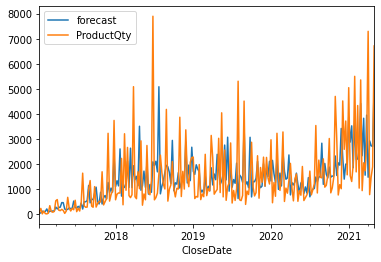

<Figure size 5000x6000 with 0 Axes>

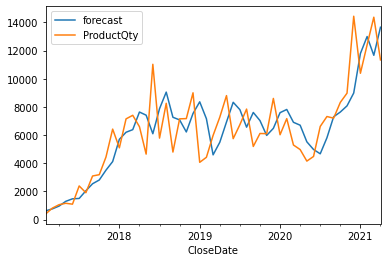

In [ ]:
# Actual vs Fitted
from matplotlib.pyplot import figure

figure(figsize=(50, 60), dpi=100)
model_fit.plot_predict(dynamic=False)
figure(figsize=(50, 60), dpi=100)
model_fit_m.plot_predict(dynamic=False)

plt.show()


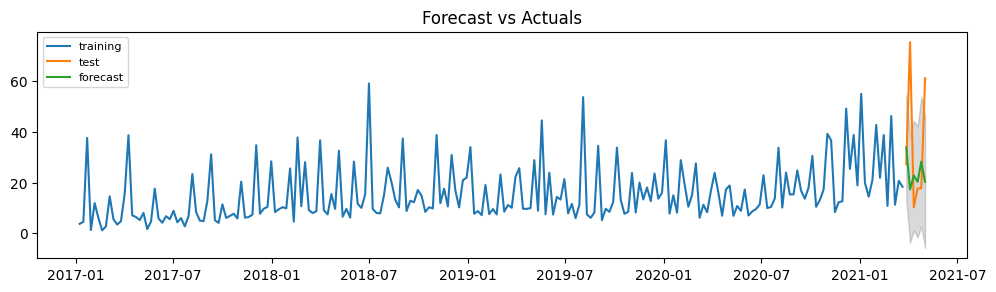

MAPE :  60.25129314011055
RMS :  29.793656528697724
MAE :  21.790826004292512
CloseDate
2021-03-28    33.802935
2021-04-04    17.271566
2021-04-11    22.747256
2021-04-18    20.262289
2021-04-25    28.190124
2021-05-02    20.257132
Freq: W-SUN, dtype: float64


In [ ]:
# Build Model
filtered_df = df.loc[(df['CloseDate'] >= '2017-01-01') & (df['CloseDate'] <= '2021-04-30') & (df['StageName'] == 'Closed Won')]
#train=filtered_df[0:17000] 
#test=filtered_df[17001:18094]

#Aggregating the dataset at weekly level
filtered_df.Timestamp = pd.to_datetime(filtered_df.CloseDate,format='%d-%m-%Y %H:%M') 
filtered_df.index = filtered_df.Timestamp 
filtered_df = filtered_df.resample('W').mean()
filtered_df['ProductQty'] = filtered_df['ProductQty'].fillna(0)
train=filtered_df[0:220] 
test=filtered_df[220:226]
model = ARIMA(train['ProductQty'], order=(3, 1, 0))  
#model = ARIMA(train['ProductQty'].tolist(), order=(3,1,0))
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(6, alpha=0.05)  # 95% confidence indicated by term alpha

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,3), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='test')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k',alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
a,b,c = ERROR_Check(test.ProductQty, fc_series)
error.loc[len(error.index)] = ['ARIMA- FORECAST', a, b,c]
print(fc_series)

In [ ]:
filtered_df = df.loc[(df['CloseDate'] >= '2017-01-01') & (df['CloseDate'] <= '2021-04-30') & (df['StageName'] == 'Closed Won')]
#train=filtered_df[0:17000] 
#test=filtered_df[17001:18094]

#Aggregating the dataset at weekly level
filtered_df.Timestamp = pd.to_datetime(filtered_df.CloseDate,format='%d-%m-%Y %H:%M') 
filtered_df.index = filtered_df.Timestamp 
filtered_df = filtered_df.resample('M').mean()
filtered_df['ProductQty'] = filtered_df['ProductQty'].fillna(0)
train=filtered_df[0:220] 
test=filtered_df[220:226]


,ProductQty
CloseDate,


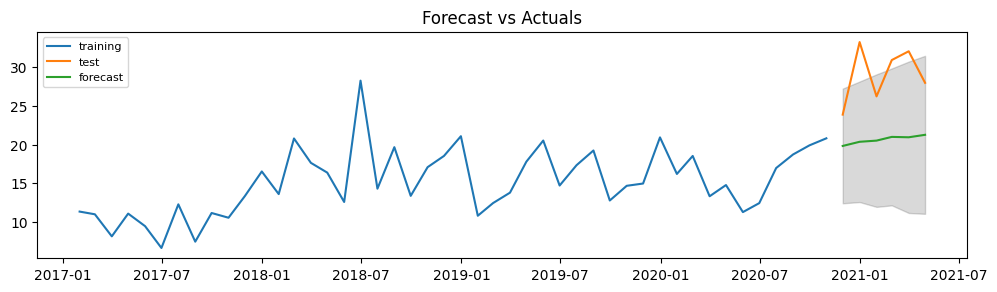

MAPE :  28.080885894335655
RMS :  8.977372027845785
MAE :  8.412573359725803
CloseDate
2020-11-30    19.816170
2020-12-31    20.354518
2021-01-31    20.505938
2021-02-28    20.986858
2021-03-31    20.937953
2021-04-30    21.255984
Freq: M, dtype: float64


In [ ]:
# Build Model
filtered_df = df.loc[(df['CloseDate'] >= '2017-01-01') & (df['CloseDate'] <= '2021-04-30') & (df['StageName'] == 'Closed Won')]
#train=filtered_df[0:17000] 
#test=filtered_df[17001:18094]

#Aggregating the dataset at weekly level
filtered_df.Timestamp = pd.to_datetime(filtered_df.CloseDate,format='%d-%m-%Y %H:%M') 
filtered_df.index = filtered_df.Timestamp 
filtered_df = filtered_df.resample('M').mean()
filtered_df['ProductQty'] = filtered_df['ProductQty'].fillna(0)
train=filtered_df[0:46] 
test=filtered_df[46:52]
model = ARIMA(train['ProductQty'], order=(3, 1, 0))  
#model = ARIMA(train['ProductQty'].tolist(), order=(3,1,0))
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(6, alpha=0.05)  # 95% confidence indicated by term alpha

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,3), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='test')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k',alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
a,b,c = ERROR_Check(test.ProductQty, fc_series)
error_month.loc[len(error.index)] = ['ARIMA- FORECAST', a, b,c]
print(fc_series[:7])

# ERROR COMPARISIONS

In [ ]:
error.head(8)

,Forecast,MAPE,RMS,MAE
0,Naive,129.446572,1477.845481,978.380531
1,Simple Average,403.426015,1083.151865,774.875871
2,Moving Average,78.650845,1162.033204,772.509482
3,Simple Exponential Smoothing,71.164275,1224.118894,809.676078
4,HOLT Linear Trend,4236.897302,12527.544330,11738.005924
5,HOLT Winter Trend,946.453301,3193.388807,2955.328282
6,ARIMA- FORECAST,60.251293,29.793657,21.790826
7,ARIMA- FORECAST,28.080886,8.977372,8.412573


In [ ]:
error_month.head(9)

,Forecast,MAPE,RMS,MAE
1,Naive,34.403167,2586.837920,1976.961538
2,Simple Average,181.910028,3338.217203,2601.189349
3,Moving Average,54.260306,4000.604877,2888.865385
4,Simple Exponential Smoothing,24.599847,1901.592726,1442.481580
5,HOLT Linear Trend,265.705604,8991.724104,8700.613492
6,HOLT Winter Trend,241.580898,5100.009294,3806.445403
8,ARIMA- FORECAST,28.080886,8.977372,8.412573
